# Technical Analysis #

[Investopedia's definition of technical analysis](https://www.investopedia.com/terms/t/technicalanalysis.asp) is "*a method of evaluating statistical trends in trading activity, typically involving price movement and volume. It is used to identify trading and investment opportunities.*"

This Notebook aims to show how to:
1. Programmatically source financial data, 
2. Apply technical analysis on this data, and 
3. Plot the results. 

The first step is to import the packages required for this exercise.

## Import libraries ##

In [1]:
# Import packages

# Data Frames
import pandas as pd

# Vector operations
import numpy as np

# Financial Data 
import yfinance as yf # pip install yfinance

# Dates and Times
import datetime as dt

# Plotting
import matplotlib.pyplot as plt
import mplfinance as mpf # pip install mplfinance
import matplotlib.dates as mdates

## Read, write and summarize raw data ##

In [ ]:
# Read in the data.
# Set ticker and get historical data for past time period.

ticker = 'AAPL'
period = '6mo'
market_data = yf.download(ticker, period=period, multi_level_index=False)
market_data

In [ ]:
market_data.describe()

In [ ]:
market_data.info()

In [ ]:
# Timestamp the filename

# Get the current date and time.
filename = dt.datetime.now()
# Create a string format from the current date and time.
filename = filename.strftime("_%Y%m%d_%H%M%S") 
# Prepend data folders, append file extension.
filename = 'data/' + ticker + filename + ".csv"

# Show the filename.
filename

In [9]:
# Write out the data.
# Save the data to a CSV file.
market_data.to_csv(filename)

## Initial Observations ##

1. The data is clean: no blank values or NaNs.

2. The data contains trading volumes and share price information for the specified ticker and the specified (default = daily) time interval. The share price information is split into the opening  price, the highest price, the lowest price, and the closing price. These four data points for share price are often abbreviated to ['ohlc'](https://en.wikipedia.org/wiki/Open-high-low-close_chart).

3. The 'Date' column has already been loaded as dtype = datetime and set as the index of the Data Frame.

## Plotting Market Data for the specified Ticker ##

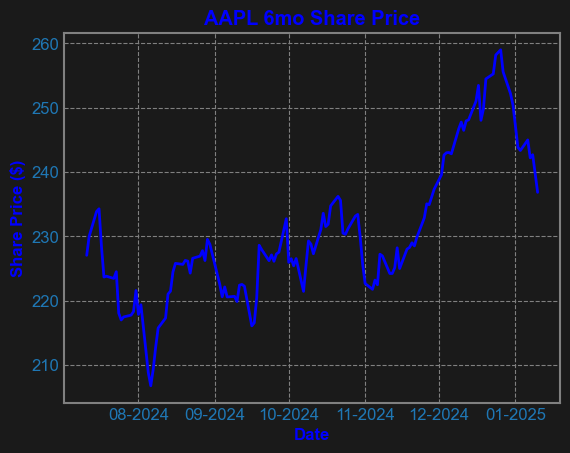

In [56]:
# Plot the Closing prices

# https://coderslegacy.com/python/dark-themes-in-matplotlib/#:~:text=Matplotlib%20provides%20a%20built-in%20theme%20that%20can%20be,color%20to%20white%2C%20providing%20a%20dark%20mode%20theme.
plt.style.use({
    'axes.facecolor': '#1a1a1a',
    'axes.edgecolor': 'gray',
    'axes.labelcolor': 'white',
    'text.color': 'white',
    'xtick.color': 'tab:blue',
    'ytick.color': 'tab:blue',
    'grid.color': 'gray',
    'figure.facecolor': '#1a1a1a',
    'figure.edgecolor': '#1a1a1a',
    'savefig.facecolor': '#1a1a1a',
    'savefig.edgecolor': '#1a1a1a',
})

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title(ticker + " " + period + " Share Price", weight='bold', color = 'blue')

# Axis labels.
ax.set_xlabel('Date', weight='bold', color = 'blue')
ax.set_ylabel('Share Price ($)', weight ='bold', color = 'blue')

# Set date format on x-axis
# https://stackoverflow.com/questions/14946371/editing-the-date-formatting-of-x-axis-tick-labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

# Generate plot
ax.plot(market_data["Close"], color = 'blue')

# Add Grid Lines
ax.grid(True)

## Technical Indicators ##

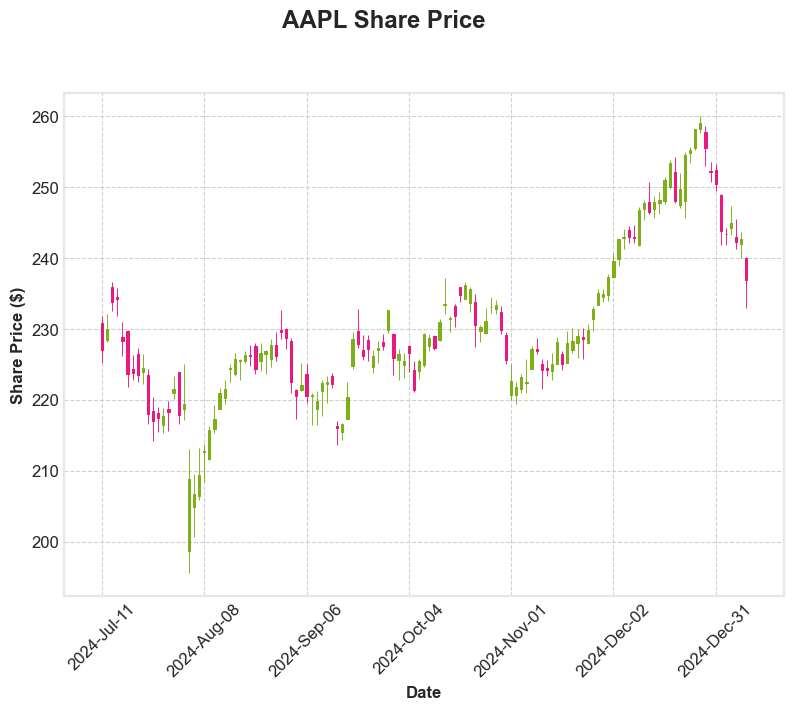

In [54]:
# Plot open, close, high and low price data on a candlestick chart, using mplfinance.
# https://github.com/matplotlib/mplfinance#tutorials
# https://plainenglish.io/blog/plot-stock-chart-using-mplfinance-in-python-9286fc69689
# Initially experienced an error due to multi-column names. Set this parameter to False during the download:
# https://stackoverflow.com/questions/79133206/mplfinance-error-data-for-column-open-must-be-all-float-or-int

mpf.plot(market_data, type='candle', style='binance', figscale=1.25, 
         title=ticker + " Share Price", ylabel='Share Price ($)', xlabel='Date')

## Trading Strategies ##

In [ ]:
# Increase time window for analysis.

period = '5y'
market_data = yf.download(ticker, period=period, multi_level_index=False)
market_data

### Trend Following ###

Trend following trading strategies aim to identify the beginning / end of an upwards or downwards trend, and buy or sell the asset accordingly. Moving averages are one way of identifying trends in the market.

In [134]:
# https://www.pyquantnews.com/free-python-resources/implementing-technical-indicators-in-python-for-trading
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

In [ ]:
market_data['sma 50'] = calculate_sma(market_data['Close'], 50)
market_data['sma 200'] = calculate_sma(market_data['Close'], 200)

market_data

In [ ]:
# https://en.wikipedia.org/wiki/Moving_average
# https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

# Set look back period for simple moving average
short_window = 50

# Calculate simple moving average (sma) for specified window (e.g 50 days)
market_data['sma ' + str(short_window)] = market_data['Close'].rolling(window=short_window).mean()

# Create column for sma signals and initiate with values of 0.0
market_data['sma ' + str(short_window) + ' signal' ] = 0.0

# Generate trend signals based on sma
# 1.0 signals an upward trend, i.e. the price is above the moving average.
# -1.0 signals a downward trend, i.e the price is below the moving average.
# 0.0 indicates the price is neither above nor below the moving average

market_data['sma ' + str(short_window) + ' signal' ] = np.where(
    market_data['Close'] > market_data['sma '+ str(short_window)], 1.0,
    (np.where(market_data['Close'] < market_data['sma '+ str(short_window)], -1.0, 0.0))
)

market_data

Visuialise the trends identified by the moving average.

In [ ]:
# Plot the Closing prices and the Moving Average

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title(ticker + " " + str(short_window) + " Day Moving Average", weight='bold')

# Axis labels.
ax.set_xlabel('Date', weight='bold')
ax.set_ylabel('Share Price ($)', weight ='bold')

# Generate plot
ax.plot(market_data["Close"], color = 'blue', linewidth = 1, label = 'Close')
ax.plot(market_data["sma "+ str(short_window)], color = 'orange', linewidth = 1, label = 'sma ' + str(short_window))

plt.legend(loc=2)

# Annotations 
### Note: Annotations below are specific for AAPL ticker ###
# They will need to be adjusted for other tickers
# https://campus.datacamp.com/courses/introduction-to-data-visualization-with-matplotlib/plotting-time-series?ex=9

ax.annotate("Upward Trend", 
            xy=(pd.Timestamp("2020-04-15"),70),
            xytext=(pd.Timestamp("2019-10-01"),150),
            arrowprops={"arrowstyle":"->", "color":"green"})

ax.annotate("Upward Trend", 
            xy=(pd.Timestamp("2023-01-25"),140),
            xytext=(pd.Timestamp("2023-01-01"),75),
            arrowprops={"arrowstyle":"->", "color":"green"})

ax.annotate("Upward Trend", 
            xy=(pd.Timestamp("2024-05-01"),175),
            xytext=(pd.Timestamp("2023-04-01"),225),
            arrowprops={"arrowstyle":"->", "color":"green"})

### Moving Average Crossover ###

In [ ]:
# https://paperswithbacktest.com/wiki/yfinance
# https://www.slingacademy.com/article/creating-simple-trading-strategies-with-yfinance-data/
# https://www.datacamp.com/tutorial/finance-python-trading

# Set longer look back period
long_window = 200

# Calculate simple moving average (sma) for specified window (e.g 200 day)
market_data['sma ' + str(long_window)] = market_data['Close'].rolling(window=long_window).mean()

# Create column for moving average crossover signals and initiate with values of 0.0
market_data['mac_signal'] = 0.0

# Generate trend signals based on moving average crossover (mac)
# 1.0 signals an upward trend, i.e. the short term sma is above the long term sma.
# -1.0 signals a downward trend, i.e the short term sma is below the long term sma.
# 0.0 indicates the short term sma  is neither above nor below the long term sma.

market_data['mac_signal'] = np.where(
    market_data['sma ' + str(short_window)] > market_data['sma '+ str(long_window)], 1.0,
    (np.where(market_data['sma ' + str(short_window)] < market_data['sma '+ str(long_window)], -1.0, 0.0))
)

market_data


In [ ]:
# Plot the Closing prices and the Moving Average

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title(ticker + " Moving Day Averages", weight='bold')

# Axis labels.
ax.set_xlabel('Date', weight='bold')
ax.set_ylabel('Share Price ($)', weight ='bold')

# Generate plot
ax.plot(market_data["Close"], color = 'blue', linewidth = 1, label = 'Close')
ax.plot(market_data["sma "+ str(short_window)], color = 'orange', linewidth = 1, label = 'sma ' + str(short_window))
ax.plot(market_data["sma "+ str(long_window)], color = 'turquoise', linewidth = 1, label = 'sma ' + str(long_window))
#ax.plot(market_data['Volume'])

plt.legend(loc=2)

Include volumetric data

In [ ]:
# Add a subplot of historical volumes
plots = market_data[['Close', 'Volume']].plot(subplots=True, figsize=(10, 10))
plt.show()

In [ ]:
# Plot the Closing prices and the Moving Average
# https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/


plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

# Title.
ax1.set_title(ticker + " Moving Day Averages & Volumes", weight='bold')

# Axis labels.
ax1.set_xlabel('Date', weight='bold')
ax1.set_ylabel('Share Price ($)', weight ='bold')
ax2.set_ylabel('Trades', weight ='bold')

# ax2 = market_data.plot(x_compat=True)

# Generate plot
ax1.plot(market_data["Close"], color = 'blue', linewidth = 1, label = 'Close')
ax1.plot(market_data["sma "+ str(short_window)], color = 'orange', linewidth = 1, label = 'sma ' + str(short_window))
ax1.plot(market_data["sma "+ str(long_window)], color = 'turquoise', linewidth = 1, label = 'sma ' + str(long_window))
ax2.plot(market_data['Volume'], linewidth = 1, label = 'Volume')
# ax2.bar(market_data.index, market_data['Volume'], label = 'Volume')

# https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# fig.legend(loc='upper center', ncol=4)
ax1.legend(loc='upper center', ncol=3)
ax2.legend(loc=1)

In [ ]:
# Add simple moving averages and volume to candlestick chart
# https://plainenglish.io/blog/plot-stock-chart-using-mplfinance-in-python-9286fc69689
# https://stackoverflow.com/questions/71179218/what-kind-of-moving-average-will-be-drawn-when-we-use-mpl-finance-mav-function

mpf.plot(market_data, type='candle', style='binance', mav=(5,20), volume=True, figscale=1.5, 
         title=ticker + " Share Price", ylabel='Share Price ($)', xlabel='Date')

### RSI ###

### Mean Reversion ###

In [12]:
# https://www.slingacademy.com/article/backtesting-a-mean-reversion-strategy-with-yfinance/

## Backtesting ##

## End